##  Content

* #### **Identify and handle missing values**;
* #### **Data formatting**;
* #### **Data normalization (centering/scaling)**;
* #### **Data binning**;
* #### **Turning Categorial values to numerical variables**.

In [2]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

df = pd.read_csv(url, header = None) # none must be passed because there aren't headers in the dataset
headers = ["symbolic", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg","price"]
df.columns = headers

In [3]:
#Simple Dataframe Operations

df.head(2)

,symbolic,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [4]:
#Acessing a column of the dataframe

df["symbolic"] = df["symbolic"] +1 
df.head(2)

,symbolic,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,4,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,4,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


### Dealing with missing values

**Drop The missing values**;
* Drop the variable
* Drop the data entry

**Replace the missing values**;

* replace it with an average (of similiar datapoints)
* replace it by frequency
* replace it based on other functions

**Leave it as missing data**.

In [5]:
# The dropna fuction to drop values like NaN. By specifying "axis=0" it drops the row, while "axis=1" 
#drops the columns that contain missing values.

#Since we want to predict the price of the cars, we have
#to remove the cars which doesnt  have a listed price.

#subset defines in which column the search will be done
#inplace = True modify the dataframe.
df.dropna(subset = ["price"], axis=0, inplace = True)

df["price"]


0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: object

In [6]:
import numpy as np 
#Replacing NaN values with newly calculated values

#For example, we want to replace the missing values of the
# variable "normalized losses" by the mean of the variable.
#So, we do:

mean = df["normalized-losses"][3:4].mean()

df["normalized-losses"].replace(mean)

0        ?
1        ?
2        ?
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: object

###  Wrapping up

In [7]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT]})

df.head()

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [8]:
df.dropna(subset = ["toy"], axis = 0) #drop the row with toy NaN or NaT



,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [9]:
df.dropna(axis = 1) # drop all the columns with NaN or NaT

,name
0,Alfred
1,Batman
2,Catwoman


In [10]:
df.dropna(subset = ["born"], axis = 0)

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [11]:
#Up there, there's no inpĺace, so the dataframe wasn't modified:

In [12]:
#Modifying it: 
#subset specifies wich columns the fuction will look for missing values

df.dropna(subset=['toy', 'born'], axis = 0, inplace = True)
df

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [13]:
df = pd.DataFrame({"Price": [10, np.nan, 10, 40],
      "Length":[0.1, 0.3, np.nan, 0.1],
      "Sales": [100, 120, 200, np.nan]
     })

df

,Price,Length,Sales
0,10.0,0.1,100.0
1,NaN,0.3,120.0
2,10.0,NaN,200.0
3,40.0,0.1,NaN


In [14]:
mean = df["Price"].mean()
df["Price"].replace(np.nan, mean, inplace = True)
df

,Price,Length,Sales
0,10.0,0.1,100.0
1,20.0,0.3,120.0
2,10.0,NaN,200.0
3,40.0,0.1,NaN


#### Data Formating

In a survey, for example, people can describe their living city in different formats: Ny,NY, New York, new york and so on. In a dataset, in that case, it is useful to padronize (or format) the values so the analisys get easier. It's commom perform conversions between data tymes and numerical patterns too. 





In [15]:
#Considering the feature named city-mpg which refers to the car fuel
#consumption in miles per gallon unit. If someone lives in a country
#that uses the metric units, it's reasonable perform the conversion between units.

df = pd.DataFrame({"city-mpg": [21,21,10,20,18,20,26]})
df.rename(columns = {"city-mpg": "city-L/100km"}, inplace = True)
df

,city-L/100km
0,21
1,21
2,10
3,20
4,18
5,20
6,26


##### Converting Data Types

In [16]:
#First, we identify the data types:

df.dtypes

city-L/100km    int64
dtype: object

In [17]:
df["city-L/100km"].astype("int", inplace = True)

0    21
1    21
2    10
3    20
4    18
5    20
6    26
Name: city-L/100km, dtype: int64

### Basics of Normalization 

Several approaches for normalization:

* Simple Feature scaling

$$ x_{new} = \frac{x_{old}}{x_{max}} $$ 

* Min-Max

$$ x_{new} = \frac{x_{old} - x_{min}}{{x_{max} - x_{min}}} $$

* Z_score

$$x_{new} = \frac{x_{old} - \mu}{\sigma}$$

where $\mu$ is the average of the feature and the $\sigma$ is the standart deviation.

In [18]:
norm_df = pd.DataFrame({"length":  [168.8,168.8, 180.0, 178.0, 165.2],
                   "width":   [64.1, 64.1, 65.6, 80.0, 30.0],
                   "height":  [48.8, 48.8, 52.4, 60.8, 80.7]})

In [19]:
norm_df

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,180.0,65.6,52.4
3,178.0,80.0,60.8
4,165.2,30.0,80.7


In [20]:
#Applying the simple feature scaling

norm_df["length"] = norm_df["length"]/norm_df["length"].max()
norm_df["length"].max()

norm_df

,length,width,height
0,0.937778,64.1,48.8
1,0.937778,64.1,48.8
2,1.000000,65.6,52.4
3,0.988889,80.0,60.8
4,0.917778,30.0,80.7


In [21]:
#Applying the min-max method

norm_df["width"] = ((norm_df["width"] - norm_df["width"].min())/(norm_df["width"].max() - norm_df["width"].min()))
norm_df

,length,width,height
0,0.937778,0.682,48.8
1,0.937778,0.682,48.8
2,1.000000,0.712,52.4
3,0.988889,1.000,60.8
4,0.917778,0.000,80.7


In [22]:
#Applying the z_score

norm_df["height"] = (norm_df["height"] -norm_df["height"].mean())/norm_df["height"].std()

norm_df

,length,width,height
0,0.937778,0.682,-0.706461
1,0.937778,0.682,-0.706461
2,1.000000,0.712,-0.438750
3,0.988889,1.000,0.185911
4,0.917778,0.000,1.665761


### Binning: converting a range of numbers into a word

In [43]:
# Considering the following dataset:

price = pd.DataFrame({"price": [1,2,100,200,300,400, 1000,2000,2500,3000,3500]})
price

,price
0,1
1,2
2,100
3,200
4,300
5,400
6,1000
7,2000
8,2500
9,3000


In [44]:
#Sometimes it can be useful to group a similiar range of numbers into a"bin",
#and give a name to it. To do that, we do:


bins = np.linspace(min(price["price"]), max(price["price"]),4)
bins #generate 3 bins (or 3 groups, divisions...)

bins_names = ["low", "medium", "high"]

price["price-binned"] = pd.cut(price["price"], bins, labels = bins_names, include_lowest = True)

'''From docs: Use cut when you need to segment and 
sort data values into bins. This function is also useful 
for going from a continuous variable to a categorical variable. '''

price


,price,price-binned
0,1,low
1,2,low
2,100,low
3,200,low
4,300,low
5,400,low
6,1000,low
7,2000,medium
8,2500,high
9,3000,high


(array([7., 1., 3.]),
 array([1.00000000e+00, 1.16733333e+03, 2.33366667e+03, 3.50000000e+03]),
 <a list of 3 Patch objects>)

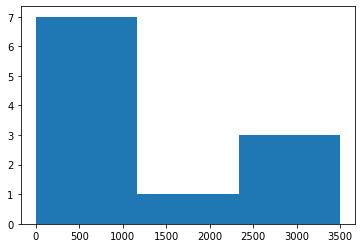

In [47]:
import matplotlib.pyplot as plt

plt.hist(price["price"], bins)

#The histogram below gives us an idea of the data binned. We have just 1 medium value, while 7 are low and 3 high. 

### Turning categorical variables into quantitative variables: One-Hot encoding Method



In [114]:
df = pd.DataFrame({"Fuel":["gas", "diesel", "gas","diesel","gas"],
                    "Sales":[101,343,1000,234,291]})
df

,Fuel,Sales
0,gas,101
1,diesel,343
2,gas,1000
3,diesel,234
4,gas,291


In [102]:
#The pandas.get_dummies() method convert categorical
#variables to dummy variables (0 or 1). This method encoding is called One Hot Encoding

df = pd.get_dummies(df["Fuel"])


In [103]:
df

,diesel,gas
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [115]:
#To append the encoded columns to the dataframe, just specify the column to perform the encoding

df = pd.get_dummies(df, columns = ["Fuel"])


In [116]:
df

,Sales,Fuel_diesel,Fuel_gas
0,101,0,1
1,343,1,0
2,1000,0,1
3,234,1,0
4,291,0,1
